# Entendimento dos dados

## Bases de dados

* Origem: https://queimadas.dgi.inpe.br/queimadas/bdqueimadas
* Formato: CSV

In [ ]:
# Importação das bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Leitura da base
df = pd.read_csv('/content/drive/MyDrive/IA/Machine Learning/focos.csv')

In [ ]:
df

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2010/01/01 15:40:00,AQUA_M-T,Brasil,SERGIPE,JAPOATA,Mata Atlantica,NaN,NaN,NaN,-10.34700,-36.77700,NaN
1,2010/01/01 15:41:00,AQUA_M-T,Brasil,PERNAMBUCO,PESQUEIRA,Caatinga,NaN,NaN,NaN,-8.44200,-36.68300,NaN
2,2010/01/01 15:41:00,AQUA_M-T,Brasil,SERGIPE,PORTO DA FOLHA,Caatinga,NaN,NaN,NaN,-9.86100,-37.53200,NaN
3,2010/01/01 15:41:00,AQUA_M-T,Brasil,PERNAMBUCO,PESQUEIRA,Caatinga,NaN,NaN,NaN,-8.44500,-36.66700,NaN
4,2010/01/01 17:14:00,AQUA_M-T,Brasil,SANTA CATARINA,SAO JOSE DO CERRITO,Mata Atlantica,NaN,NaN,NaN,-27.54200,-50.80200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2768221,2022/03/20 16:48:00,AQUA_M-T,Brasil,PARA,PARAGOMINAS,Amazonia,0.0,7.2,0.0,-3.17521,-47.89494,7.8
2768222,2022/03/20 16:43:00,AQUA_M-T,Brasil,MATO GROSSO,COCALINHO,Cerrado,0.0,0.5,0.0,-14.51014,-51.05017,25.7
2768223,2022/03/20 16:45:00,AQUA_M-T,Brasil,PIAUI,URUCUI,Cerrado,2.0,0.0,0.3,-8.01693,-44.39533,6.3
2768224,2022/03/20 16:41:00,AQUA_M-T,Brasil,RIO DE JANEIRO,TRAJANO DE MORAES,Mata Atlantica,5.0,0.9,0.8,-22.07493,-42.24797,13.4




## Tamanho da base de dados



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768226 entries, 0 to 2768225
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   datahora      object 
 1   satelite      object 
 2   pais          object 
 3   estado        object 
 4   municipio     object 
 5   bioma         object 
 6   diasemchuva   float64
 7   precipitacao  float64
 8   riscofogo     float64
 9   latitude      float64
 10  longitude     float64
 11  frp           float64
dtypes: float64(6), object(6)
memory usage: 253.4+ MB


## Atributos

In [ ]:
df.shape[1] # Quantidade de atributos

12

In [ ]:
pd.DataFrame(
    {
    'Atributo': df.columns,
    'Tipo': ['Qualitativo'] * 6 + ['Quantitativo'] * 6,
    'Classificação': ['Ordinal'] + ['Nominal'] * 5 + ['Discreto'] + ['Contínuo'] * 5,
    }
)

,Atributo,Tipo,Classificação
0,datahora,Qualitativo,Ordinal
1,satelite,Qualitativo,Nominal
2,pais,Qualitativo,Nominal
3,estado,Qualitativo,Nominal
4,municipio,Qualitativo,Nominal
5,bioma,Qualitativo,Nominal
6,diasemchuva,Quantitativo,Discreto
7,precipitacao,Quantitativo,Contínuo
8,riscofogo,Quantitativo,Contínuo
9,latitude,Quantitativo,Contínuo


## Alvo

* O **riscofogo** tem potencial de se tornar um alvo. Considerando um indicador de probabilidade percentual de incêndio.
  * **riscofogo >= 1** → **alvo (1)**
  * **riscofogo < 1** → **alvo (0)**

In [ ]:
df['alvo'] = df['riscofogo'].apply(lambda x: 1 if x >= 1 else 0)

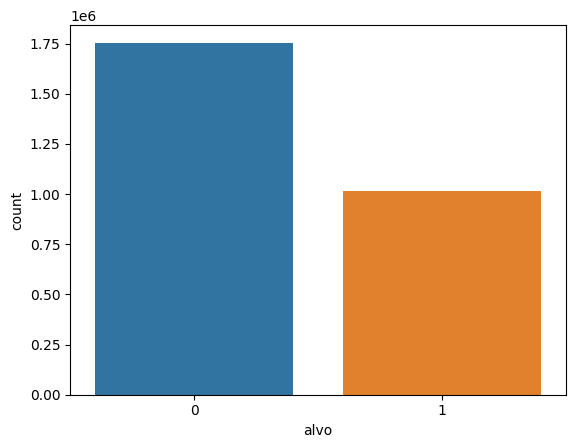

In [ ]:
sns.countplot(x='alvo', data=df);

## Categorias

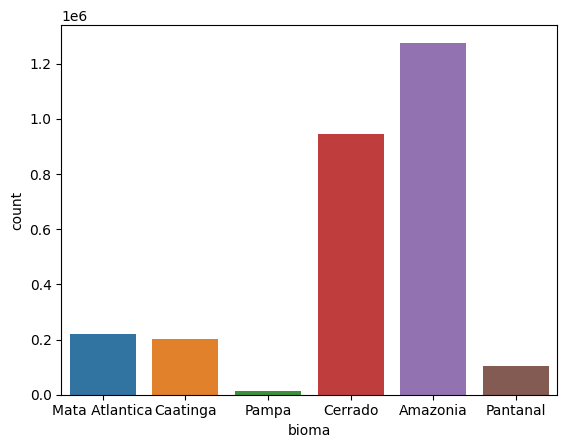

In [ ]:
sns.countplot(x='bioma', data=df);

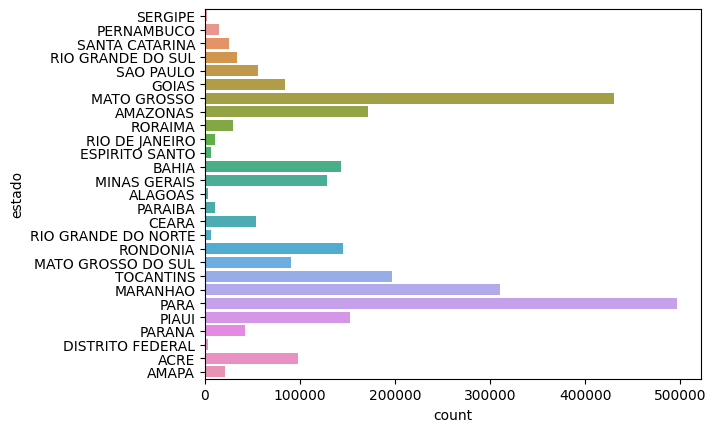

In [ ]:
sns.countplot(y='estado', data=df);

## Valores nulos

In [ ]:
df.isnull().sum()

datahora              0
satelite              0
pais                  0
estado                0
municipio             0
bioma                 0
diasemchuva      837404
precipitacao     837404
riscofogo        837404
latitude              0
longitude             0
frp             1612550
alvo                  0
dtype: int64

### Tratamento

* **diasemchuva** → **data**, **estado** e **bioma**
* **precipitacao** → **hora**
* **frp** → **diasemchuva** e **riscofogo**

## Valores Distintos

In [ ]:
df.nunique()

datahora         39320
satelite             1
pais                 1
estado              27
municipio         5198
bioma                6
diasemchuva        632
precipitacao      3693
riscofogo          102
latitude        352618
longitude       368091
frp              11644
alvo                 2
dtype: int64

> Analisando a primeira vista podemos negligenciar certos atributos como **satelite** e **pais** já que possuem valores unicos e são indiferente ao objetivo de minimizar um incêndio, portanto não há necessidade de seus uso para ML.

## Atributos por categoria

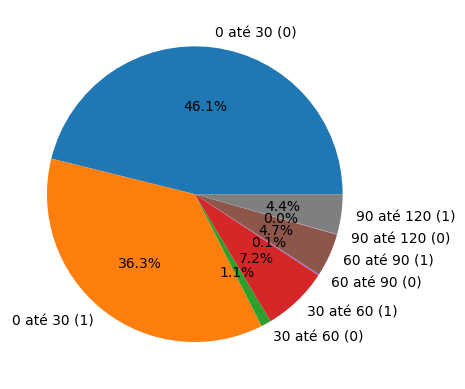

In [ ]:
# Agrupamento por diasemchuva
bins = pd.cut(df['diasemchuva'], range(0, 150, 30), include_lowest=True)
_df = df.groupby([bins, 'alvo'], dropna=False).size()
_df.plot(kind='pie', labels=[
    '0 até 30 (0)', '0 até 30 (1)',
    '30 até 60 (0)', '30 até 60 (1)',
    '60 até 90 (0)', '60 até 90 (1)',
    '90 até 120 (0)', '90 até 120 (1)'
], autopct='%1.1f%%');

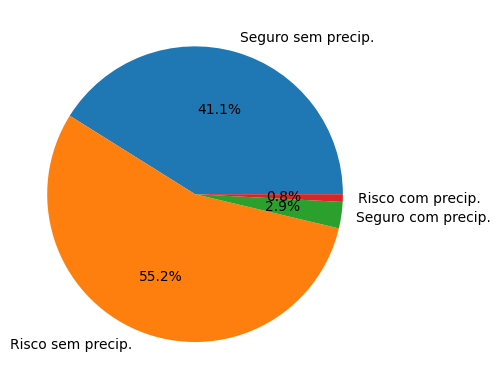

In [ ]:
# Agrupamento por precipitacao
bins = pd.cut(df['precipitacao'], range(0, 3), include_lowest=True)
_df = df.groupby([bins, 'alvo'], dropna=False).size()
_df.plot(kind='pie', labels=(
    'Seguro sem precip.', 'Risco sem precip.',
    'Seguro com precip.', 'Risco com precip.'
), autopct='%1.1f%%');

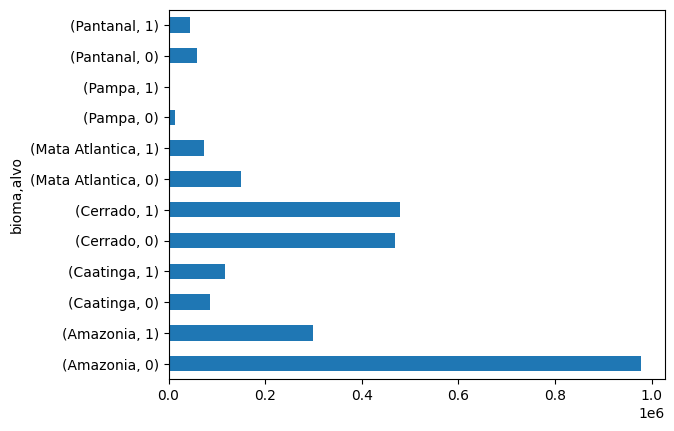

In [ ]:
# Agrupamento por bioma
_df = df.groupby(['bioma', 'alvo'], dropna=False).size()
_df.plot(kind='barh');

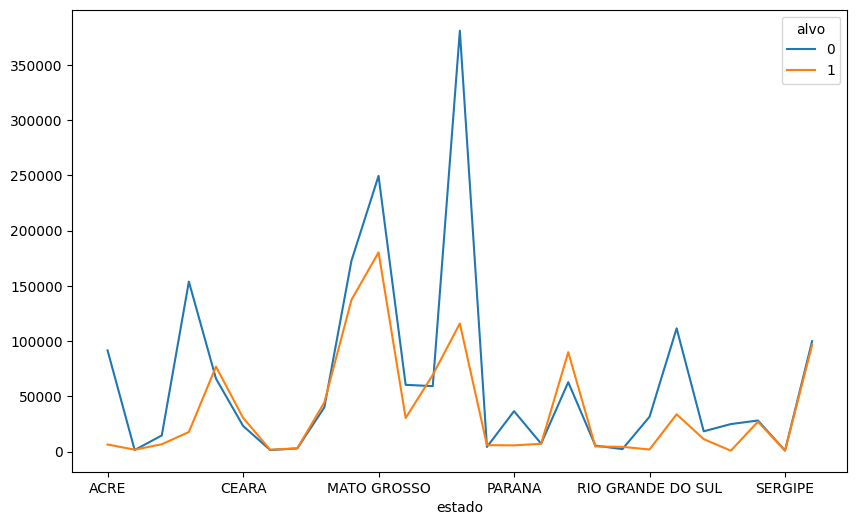

In [ ]:
# Agrupamento por estado
_df = df.groupby(['estado', 'alvo']).size().unstack(fill_value=0)
_df.plot(figsize=(10, 6));

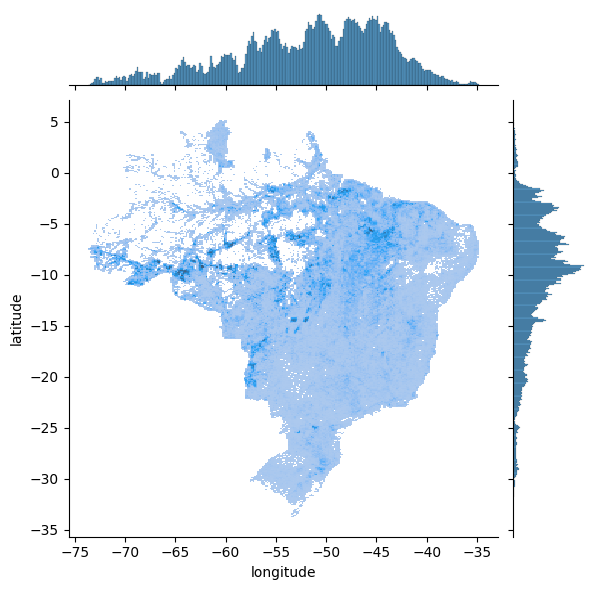

In [ ]:
sns.jointplot(df, x='longitude', y='latitude', kind='hist');

## Boxplot

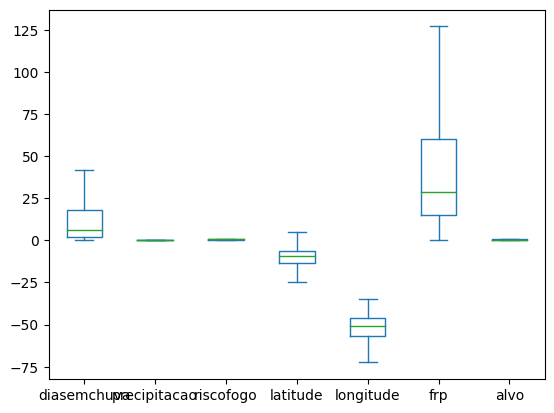

In [ ]:
df.plot(kind='box', showfliers=False);

## Coeficiente de correlação

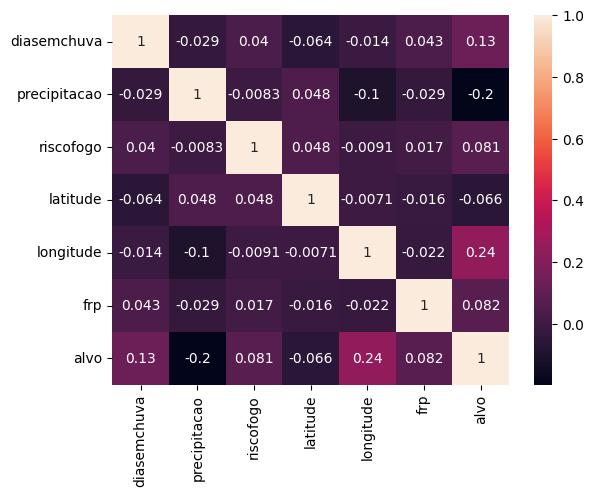

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

## ANOVA

In [ ]:
from scipy import stats

In [ ]:
maior_chance = df[df['alvo'] >= 1]
menor_chance = df[df['alvo'] <= 0]

In [ ]:
print('ANOVA Latitude:', stats.f_oneway(
    menor_chance['latitude'], maior_chance['latitude'])
)
print('ANOVA Longitude:', stats.f_oneway(
    menor_chance['longitude'], maior_chance['longitude'])
)

ANOVA Latitude: F_onewayResult(statistic=11966.466188338562, pvalue=0.0)
ANOVA Longitude: F_onewayResult(statistic=166158.98785683134, pvalue=0.0)



> * p-value < α = 0.05 (95% confiança)
> * Região de aceitação H0 para as duas variáveis
> * Não exite diferença na média entre os grupos


## Outliers

In [ ]:
def outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   outliers = df[((df < (q1 - 1.5* IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers

In [ ]:
#@title Quantidade de Outliers
outs = dict()
for column in df.columns[6:]:
  outs[column] = outliers_IQR(df[column]).count()
outs

{'diasemchuva': 275987,
 'precipitacao': 359281,
 'riscofogo': 10337,
 'latitude': 88020,
 'longitude': 12413,
 'frp': 117311,
 'alvo': 0}